In [52]:
import boto3

In [53]:
import pandas as pd
from io import StringIO

In [54]:
# Set up S3 client
client = boto3.client('s3')

In [55]:
bucket_name = 'viamericas-datalake-dev-us-east-1-283731589572-analytics'
path = 'Forecast/Forecast_analysis/forecast_7d_20_12_2022/' # Folder under analysis

In [56]:
# Listing objects 
elements = client.list_objects(Bucket=bucket_name, Prefix=path)

In [57]:
# Initialize an empty list 
dfs = []

In [58]:
# Iterate through each CSV in the S3 path
for obj in elements.get('Contents', []):
#    print(obj)
    # Check if the object is a CSV file
    if obj['Key'].endswith('.csv'):
        # Read CSV content from S3
        response = client.get_object(Bucket=bucket_name, Key=obj['Key'])
        print(obj['Key'])
        csv_content = response['Body'].read().decode('utf-8')

        # Transform CSV content to df
        df = pd.read_csv(StringIO(csv_content))

        dfs.append(df)

Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part0.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part1.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part10.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part11.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part12.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part13.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part14.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part15.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecast_7d_20_12_2022_2024-01-16T14-00-35Z_part16.csv
Forecast/Forecast_analysis/forecast_7d_20_12_2022/forecas

In [59]:
final_df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_996/3658546852.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(dfs, ignore_index=True)


In [60]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.date

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  763 non-null    object 
 1   country  763 non-null    object 
 2   payer    763 non-null    object 
 3   date     763 non-null    object 
 4   p10      763 non-null    float64
 5   p50      763 non-null    float64
 6   p90      763 non-null    float64
 7   mean     763 non-null    float64
dtypes: float64(4), object(4)
memory usage: 47.8+ KB


In [62]:
final_df['item_id'].nunique()

109

In [63]:
final_df.payer.unique()

array(['credomatic', 'farmacias guadalajara (ut)', 'zeepay',
       'walmart (ut)', 'caja popular mexicana (ut)', 'cebuana lhuillier',
       'transfer directo', 'transferto - thunes', 'merchantrade',
       'cooperativa cacil (ut)', 'fedecredito (ryt)', 'argenper',
       'banco popular honduras (ut)', 'bam - banco agromercantil (ut)',
       'bancolombia', 'banco de credito del peru - bcp (ut)',
       'bantrab (ut)', 'elektra (bts)',
       'banco davivienda salvadoreno (bts)', 'banco ganadero (bolivia)',
       'intermex', 'easy pagos', 'banco industrial els (red chapina)',
       'banhcafe', 'unitransfer', 'micoope-fenacoac (red chapina)',
       'lafise', 'banrural (honduras)', 'davivienda - honduras (bts)',
       'viamericas usa deposits', 'promerica',
       'telecomm telegrafos (appriza)', 'banco de occidente',
       'grupo exito (tn)', 'davivienda', 'banco daycoval',
       'empenos del sur (anterior balsas)', 'mastercard atm network',
       'nafa', 'abank (tn)', 'ecuagiro

In [64]:
final_df.head()

,item_id,country,payer,date,p10,p50,p90,mean
0,45,el salvador,credomatic,2022-12-21,45625.228478,60245.407524,75139.181531,60077.347561
1,45,el salvador,credomatic,2022-12-22,41652.042811,56555.369088,71225.388148,56404.434529
2,45,el salvador,credomatic,2022-12-23,49708.026189,67543.990611,84096.378508,67421.292343
3,45,el salvador,credomatic,2022-12-24,41700.631387,57450.984828,71309.528450,57321.822688
4,45,el salvador,credomatic,2022-12-25,32689.628719,48934.233046,64294.765185,48670.759991


In [65]:
final_df.country.unique()

array(['el salvador', 'mexico', 'senegal', 'philippines', 'portugal',
       'ghana', 'indonesia', 'thailand', 'honduras', 'peru', 'guatemala',
       'colombia', 'bolivia', 'ecuador', 'haiti',
       "cote d'ivoire (ivory coast)", 'nicaragua', 'bangladesh',
       'united states', 'united states (atm & deposits)', 'nigeria',
       'spain', 'brazil', 'guinea', 'dominican republic', 'chile',
       'burkina faso', 'costa rica', 'india', 'malaysia', 'argentina',
       'togo', 'uruguay', 'gambia, the', 'cameroon', 'benin',
       'sierra leone'], dtype=object)

In [66]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
final_df['payer_country'] = final_df['payer'] + '_' + final_df['country']

In [67]:
final_df['payer_country'].nunique()

109

In [68]:
final_df.country.nunique()

37

In [69]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [70]:
##TOP 10 FORECAST AMOUNTS BETWEEN 26/11/2022 AND 02/12/2022##
total_amount_per_payer =final_df.groupby('payer_country')['mean'].sum()
top_10_payers = total_amount_per_payer.sort_values(ascending=False).head(10)
print(top_10_payers)

payer_country
elektra (mexico)_mexico                 5.608255e+07
bancoppel (appriza)_mexico              3.234939e+07
banrural (ryt)_guatemala                2.533238e+07
banco industrial_guatemala              2.055556e+07
envios con clabe (appriza)_mexico       5.326790e+06
bbva - bancomer (bts)_mexico            5.188862e+06
msbb money_brazil                       3.928604e+06
banco de occidente_honduras             3.801255e+06
telecomm telegrafos (appriza)_mexico    3.690601e+06
banorte (ut)_mexico                     3.531176e+06
Name: mean, dtype: float64


In [71]:
##TIME INTERVAL FORECAST##
final_df.date.min(),final_df.date.max(),

(Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-27 00:00:00'))

In [72]:
final_df['mean'].sum()

213946480.138991

In [73]:
control=final_df.loc[final_df.country=='mexico']

In [74]:
control['mean'].sum()

116460810.47325575

In [75]:
pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [76]:
from pyathena import connect

In [77]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [78]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_996/3276710735.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [79]:
df_check['date'] = pd.to_datetime(df_check['date'])

In [80]:
df_check=df_check.loc[(df_check.date>'2022-12-20') & (df_check.date<'2022-12-28')]

In [81]:
df_check.date.min(),df_check.date.max()

(Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-27 00:00:00'))

In [82]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
113,BANCO BHD LEON,DOMINICAN REPUBLIC,2022-12-21,47,27017.98,0
135,CAJA POPULAR MEXICANA (UT),MEXICO,2022-12-23,201,89023.84,0
601,BANORTE (UT),MEXICO,2022-12-21,673,456365.59,5
746,BANCO INDUSTRIAL,GUATEMALA,2022-12-26,4887,2593640.64,37
995,PROMERICA,EL SALVADOR,2022-12-26,104,46921.00,0


In [83]:
df_check.country.nunique()

43

In [84]:
df_check.payer.nunique()

93

In [85]:
df_check.amount.sum()

179644310.11049998

In [86]:
control2=df_check.loc[df_check.country=='MEXICO']

In [87]:
control2.amount.sum()

98090865.0616

In [88]:
df_check.country.unique()

array(['DOMINICAN REPUBLIC', 'MEXICO', 'GUATEMALA', 'EL SALVADOR',
       'ECUADOR', 'HONDURAS', 'SPAIN', 'NICARAGUA', 'PERU', 'GAMBIA, THE',
       'CHILE', 'PHILIPPINES', 'ARGENTINA', 'UNITED KINGDOM', 'COLOMBIA',
       'UNITED STATES', 'BRAZIL', 'COSTA RICA', 'BELGIUM', 'BENIN',
       'BOLIVIA', 'THAILAND', 'URUGUAY', 'PORTUGAL', 'SENEGAL', 'NEPAL',
       'UNITED STATES (ATM & DEPOSITS)', 'NIGERIA', 'HAITI', 'GUINEA',
       'TOGO', 'INDONESIA', 'GHANA', 'KENYA', 'INDIA', 'SIERRA LEONE',
       'CAMEROON', 'MALI', "COTE D'IVOIRE (IVORY COAST)", 'FRANCE',
       'GERMANY', 'BURKINA FASO', 'LIBERIA'], dtype=object)

In [89]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_check['payer_country'] = df_check['payer'] + '_' + df_check['country']

In [90]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO                 4.874126e+07
BANCOPPEL (APPRIZA)_MEXICO              2.635008e+07
BANRURAL (RYT)_GUATEMALA                2.065990e+07
BANCO INDUSTRIAL_GUATEMALA              1.587133e+07
ENVIOS CON CLABE (APPRIZA)_MEXICO       4.397874e+06
BBVA - BANCOMER (BTS)_MEXICO            4.185272e+06
MSBB MONEY_BRAZIL                       3.105648e+06
G Y T CONTINENTAL_GUATEMALA             2.886172e+06
BANORTE (UT)_MEXICO                     2.871163e+06
TELECOMM TELEGRAFOS (APPRIZA)_MEXICO    2.788112e+06
Name: amount, dtype: float64


In [91]:
final_df.country.unique()

array(['el salvador', 'mexico', 'senegal', 'philippines', 'portugal',
       'ghana', 'indonesia', 'thailand', 'honduras', 'peru', 'guatemala',
       'colombia', 'bolivia', 'ecuador', 'haiti',
       "cote d'ivoire (ivory coast)", 'nicaragua', 'bangladesh',
       'united states', 'united states (atm & deposits)', 'nigeria',
       'spain', 'brazil', 'guinea', 'dominican republic', 'chile',
       'burkina faso', 'costa rica', 'india', 'malaysia', 'argentina',
       'togo', 'uruguay', 'gambia, the', 'cameroon', 'benin',
       'sierra leone'], dtype=object)

In [92]:
final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/tmp/ipykernel_996/2399063668.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [93]:
final_df.country.unique()

array(['EL SALVADOR', 'MEXICO', 'SENEGAL', 'PHILIPPINES', 'PORTUGAL',
       'GHANA', 'INDONESIA', 'THAILAND', 'HONDURAS', 'PERU', 'GUATEMALA',
       'COLOMBIA', 'BOLIVIA', 'ECUADOR', 'HAITI',
       "COTE D'IVOIRE (IVORY COAST)", 'NICARAGUA', 'BANGLADESH',
       'UNITED STATES', 'UNITED STATES (ATM & DEPOSITS)', 'NIGERIA',
       'SPAIN', 'BRAZIL', 'GUINEA', 'DOMINICAN REPUBLIC', 'CHILE',
       'BURKINA FASO', 'COSTA RICA', 'INDIA', 'MALAYSIA', 'ARGENTINA',
       'TOGO', 'URUGUAY', 'GAMBIA, THE', 'CAMEROON', 'BENIN',
       'SIERRA LEONE'], dtype=object)

In [94]:
df_forecast = pd.merge(df_check, final_df, on=['date','payer','country'], how='outer', indicator=True)

In [95]:
df_forecast._merge.value_counts()

_merge
both          658
right_only    105
left_only      73
Name: count, dtype: int64

In [96]:
control3=df_forecast.loc[df_forecast._merge=='left_only']
control3.payer.unique()

array(['TRANSFERTO - THUNES', 'EXPIRED ORDERS', 'TELEDOLAR-NIC',
       '7 ELEVEN (UT)', 'TRANSPAY', 'GME', 'KORI', 'NAFA'], dtype=object)

In [97]:
control4=df_forecast.loc[df_forecast._merge=='right_only']
control4.payer.unique()

array(['ZEEPAY', 'TRANSFERTO - THUNES', 'MERCHANTRADE',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'BANHCAFE',
       'DAVIVIENDA - HONDURAS (BTS)', 'BANCO DAYCOVAL',
       'MASTERCARD ATM NETWORK', 'NAFA', 'AFEX', 'M. LHUILLIER',
       'TIGO MONEY', 'SPEED MONEY', 'FARMACIAS DEL AHORRO (DATRANSFER)',
       'ARGENPER', 'TRANSPAY', 'BBVA URUGUAY (BTS)', 'AFRO INTERNACIONAL',
       'VTN', 'BANCO BISA'], dtype=object)

In [98]:
##ESTO SE NOS ESTARÍAMOS PERDIENDO EN 200 MILLONES (0.25%), ENCONTRAR DIFERENCIAS LUEGO, POR AHORA AVANZAR EN MAPES##
## CUIDADO QUE PUEDE SUCEDER TAMBIEN QUE LOS PAYERS PEQUEÑOS, NO OPEREN AGÚN DIA Y ESO EXPLIQUE QUE NO HAYA MERGE PERFECTO##
control4['mean'].sum()

3298.3464117151434

In [99]:
control4.country.unique()

array(['SENEGAL', 'PORTUGAL', 'INDONESIA', 'THAILAND', 'GHANA',
       'EL SALVADOR', 'HONDURAS', "COTE D'IVOIRE (IVORY COAST)",
       'BANGLADESH', 'BRAZIL', 'UNITED STATES (ATM & DEPOSITS)', 'GUINEA',
       'CHILE', 'BURKINA FASO', 'PHILIPPINES', 'MALAYSIA', 'MEXICO',
       'ARGENTINA', 'TOGO', 'URUGUAY', 'CAMEROON', 'BENIN', 'NIGERIA',
       'BOLIVIA'], dtype=object)

In [100]:
control5=df_forecast.loc[df_forecast._merge=='both']
control5.payer.unique()

array(['BANCO BHD LEON', 'CAJA POPULAR MEXICANA (UT)', 'BANORTE (UT)',
       'BANCO INDUSTRIAL', 'PROMERICA', 'FEDECACES (EL SALVADOR)',
       'WALDOS (APPRIZA)', 'ABANK (TN)', 'BANCO DE GUAYAQUIL',
       'CHEDRAUI (APPRIZA)', 'BANCO POPULAR HONDURAS (UT)',
       'TRANSFERTO - THUNES', 'ELEKTRA (MEXICO)', 'CREDOMATIC (BTS)',
       'BANCO DE CREDITO DEL PERU - BCP (UT)', 'BANHCAFE', 'CREDOMATIC',
       'EMPENOS DEL SUR (ANTERIOR BALSAS)', 'ELEKTRA (BTS)',
       'COOPERATIVA FRONTERIZA (UT)', 'NAFA', 'ARGENPER', 'SPEED MONEY',
       'BANCO DE ORO (BDO)', 'GIROSMEX', 'METROBANK', 'BANCO DEL AUSTRO',
       'G Y T CONTINENTAL', 'BANCO ATLANTIDA', 'BBVA - BANCOMER (BTS)',
       'ENVIOS CON CLABE (APPRIZA)', 'GRUPO EXITO (TN)', 'CARIBE EXPRESS',
       'BANCO AGRICOLA', 'VIAMERICAS USA DEPOSITS', 'AIRPAK', 'INTERMEX',
       'MSBB MONEY', 'BANRURAL (HONDURAS)', 'LAFISE',
       'FARMACIAS GUADALAJARA (UT)', 'BANCOLOMBIA', 'DAVIVIENDA',
       'TELEDOLAR', 'INTERBANK', 'FEDECREDITO (

In [101]:
#7% DIF A UNA SEMANA##
control5.amount.sum(), control5['mean'].sum()

(179436639.5705, 213943181.79257932)

In [102]:
df_forecast.amount.sum()

179644310.11049998

In [103]:
##BANCO POPULAR HONDURAS (UT)en df_check#
control6= df_check.loc[df_check.payer=='BANCO POPULAR HONDURAS (UT)']
control6.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country
2233,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-22,5,1874.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
30015,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-21,7,1945.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
38082,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-23,11,3054.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
73825,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-26,4,3957.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
76903,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-24,3,450.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
86926,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-25,1,50.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
101825,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-27,3,736.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS


In [104]:
##BANCO POPULAR HONDURAS (UT)en df_forecast#
control7= df_forecast.loc[df_forecast.payer=='BANCO POPULAR HONDURAS (UT)']
control7.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country_x,item_id,p10,p50,p90,mean,payer_country_y,_merge
11,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-22,5.0,1874.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,797.206098,1620.748427,2376.565144,1588.905749,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
210,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-21,7.0,1945.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,601.403296,1414.629602,2172.792915,1389.759907,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
274,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-23,11.0,3054.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,867.859965,1815.651625,2758.940964,1827.757898,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
524,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-26,4.0,3957.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,1001.967118,1929.590537,2869.990284,1959.405326,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
550,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-24,3.0,450.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,1169.464104,2149.990669,3010.695113,2134.717492,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
620,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-25,1.0,50.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,1411.704246,2358.201940,3355.977586,2384.935155,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
729,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-12-27,3.0,736.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,899.577064,1678.140066,2452.788346,1693.751862,BANCO POPULAR HONDURAS (UT)_HONDURAS,both


In [105]:
##LA DIFERENCIAS SE EXPLICAN PORQUE LOS PAYERS PEQUEÑOS NO OPERAN TODOS LOS DIAS Y FORECAST LANZA UN PRONOSTICO A 7D (IMPUTAR ESOS DIAS)

In [106]:
df_forecast=df_forecast.loc[df_forecast._merge!='left_only']

In [107]:
df_forecast.amount.fillna(0, inplace=True)
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 835
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   payer            763 non-null    object        
 1   country          763 non-null    object        
 2   date             763 non-null    datetime64[ns]
 3   tx               658 non-null    float64       
 4   amount           763 non-null    float64       
 5   coupon_count     658 non-null    float64       
 6   payer_country_x  658 non-null    object        
 7   item_id          763 non-null    float64       
 8   p10              763 non-null    float64       
 9   p50              763 non-null    float64       
 10  p90              763 non-null    float64       
 11  mean             763 non-null    float64       
 12  payer_country_y  763 non-null    object        
 13  _merge           763 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(8), 

In [108]:
df_forecast_final=df_forecast.loc[:, ['payer','country','date','amount','p10','p50','p90','mean']]

In [109]:
df_forecast_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 835
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payer    763 non-null    object        
 1   country  763 non-null    object        
 2   date     763 non-null    datetime64[ns]
 3   amount   763 non-null    float64       
 4   p10      763 non-null    float64       
 5   p50      763 non-null    float64       
 6   p90      763 non-null    float64       
 7   mean     763 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 53.6+ KB


In [110]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_forecast_final['payer_country'] = df_forecast_final['payer'] + '_' + df_forecast_final['country']

In [111]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,BANCO BHD LEON,DOMINICAN REPUBLIC,2022-12-21,27017.98,1.784805e+04,2.863771e+04,3.900061e+04,2.842318e+04,BANCO BHD LEON_DOMINICAN REPUBLIC
1,CAJA POPULAR MEXICANA (UT),MEXICO,2022-12-23,89023.84,7.098780e+04,9.055355e+04,1.079884e+05,9.046804e+04,CAJA POPULAR MEXICANA (UT)_MEXICO
2,BANORTE (UT),MEXICO,2022-12-21,456365.59,3.693212e+05,4.392034e+05,5.095525e+05,4.378949e+05,BANORTE (UT)_MEXICO
3,BANCO INDUSTRIAL,GUATEMALA,2022-12-26,2593640.64,2.629453e+06,3.266742e+06,3.750174e+06,3.271968e+06,BANCO INDUSTRIAL_GUATEMALA
4,PROMERICA,EL SALVADOR,2022-12-26,46921.00,4.042270e+04,5.834087e+04,7.224415e+04,5.829193e+04,PROMERICA_EL SALVADOR


In [112]:
## MAPE A 1 DÍA POR PAYER##

In [113]:
##GENERAMOS EL ERROR DE PRONOSTICO##
##ELIMINAMOS LOS CASOS CON AMOUNT==0 PORQUE GENERA UNA INDETERMINACIÓN EN EL CÁLCULO (A/0=INF)
## Y SI IMPUTAMOS 1 EN VEZ DE CERO???###

In [114]:
## POR LO PRONTO ELIMINO LOS QUE TIENEN AMOUNT CERO Y EL MAPE ESTARÁ DEFINIDO BAJO ESA CONDICION##

In [115]:
df_forecast_final=df_forecast_final.loc[df_forecast_final.amount!=0]
df_forecast_final.shape

(646, 9)

In [116]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,BANCO BHD LEON,DOMINICAN REPUBLIC,2022-12-21,27017.98,1.784805e+04,2.863771e+04,3.900061e+04,2.842318e+04,BANCO BHD LEON_DOMINICAN REPUBLIC
1,CAJA POPULAR MEXICANA (UT),MEXICO,2022-12-23,89023.84,7.098780e+04,9.055355e+04,1.079884e+05,9.046804e+04,CAJA POPULAR MEXICANA (UT)_MEXICO
2,BANORTE (UT),MEXICO,2022-12-21,456365.59,3.693212e+05,4.392034e+05,5.095525e+05,4.378949e+05,BANORTE (UT)_MEXICO
3,BANCO INDUSTRIAL,GUATEMALA,2022-12-26,2593640.64,2.629453e+06,3.266742e+06,3.750174e+06,3.271968e+06,BANCO INDUSTRIAL_GUATEMALA
4,PROMERICA,EL SALVADOR,2022-12-26,46921.00,4.042270e+04,5.834087e+04,7.224415e+04,5.829193e+04,PROMERICA_EL SALVADOR


In [117]:
control=df_forecast_final.loc[df_forecast_final.country=='MEXICO']
control

,payer,country,date,amount,p10,p50,p90,mean,payer_country
1,CAJA POPULAR MEXICANA (UT),MEXICO,2022-12-23,89023.84,7.098780e+04,9.055355e+04,1.079884e+05,9.046804e+04,CAJA POPULAR MEXICANA (UT)_MEXICO
2,BANORTE (UT),MEXICO,2022-12-21,456365.59,3.693212e+05,4.392034e+05,5.095525e+05,4.378949e+05,BANORTE (UT)_MEXICO
6,WALDOS (APPRIZA),MEXICO,2022-12-23,8940.00,3.846023e+03,6.124489e+03,8.102720e+03,6.089460e+03,WALDOS (APPRIZA)_MEXICO
10,CHEDRAUI (APPRIZA),MEXICO,2022-12-26,7951.31,4.519046e+03,7.530027e+03,1.031844e+04,7.523604e+03,CHEDRAUI (APPRIZA)_MEXICO
13,ELEKTRA (MEXICO),MEXICO,2022-12-26,7564319.22,6.698113e+06,8.168813e+06,9.420018e+06,8.180527e+06,ELEKTRA (MEXICO)_MEXICO
...,...,...,...,...,...,...,...,...,...
707,EMPENOS DEL SUR (ANTERIOR BALSAS),MEXICO,2022-12-23,52616.62,2.900012e+04,3.809417e+04,4.661683e+04,3.811725e+04,EMPENOS DEL SUR (ANTERIOR BALSAS)_MEXICO
710,FARMACIAS DEL AHORRO (DATRANSFER),MEXICO,2022-12-24,100.00,-2.060074e+01,7.254737e+01,1.768436e+02,7.163268e+01,FARMACIAS DEL AHORRO (DATRANSFER)_MEXICO
711,WALMART (UT),MEXICO,2022-12-27,189334.81,2.139018e+05,2.473540e+05,2.768894e+05,2.474206e+05,WALMART (UT)_MEXICO
713,GIROSMEX,MEXICO,2022-12-25,3060.00,2.761336e+04,3.225658e+04,3.670303e+04,3.235530e+04,GIROSMEX_MEXICO


In [118]:
###MAPE FORECAST A 1 DÍA##
forecast_1d=df_forecast_final.loc[df_forecast_final.date=='2022-12-21']

In [119]:
forecast_1d.shape

(92, 9)

In [120]:
forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)

/tmp/ipykernel_996/2323064100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)


In [121]:
forecast_1d.pe.min(), forecast_1d.pe.max()

(0.002980479333638425, 2.769539140629813)

In [122]:
forecast_1d.head(2)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
0,BANCO BHD LEON,DOMINICAN REPUBLIC,2022-12-21,27017.98,17848.050668,28637.705104,39000.613008,28423.178973,BANCO BHD LEON_DOMINICAN REPUBLIC,0.052010
2,BANORTE (UT),MEXICO,2022-12-21,456365.59,369321.187035,439203.430653,509552.515010,437894.863563,BANORTE (UT)_MEXICO,0.040474


In [123]:
forecast_1d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
298,ELEKTRA (MEXICO),MEXICO,2022-12-21,7046906.470,5.724617e+06,6.560853e+06,7.425388e+06,6.547577e+06,ELEKTRA (MEXICO)_MEXICO,0.070858
316,BANCOPPEL (APPRIZA),MEXICO,2022-12-21,3643916.165,3.233885e+06,3.769666e+06,4.309513e+06,3.760252e+06,BANCOPPEL (APPRIZA)_MEXICO,0.031926
130,BANRURAL (RYT),GUATEMALA,2022-12-21,3341374.230,2.447145e+06,2.821556e+06,3.221542e+06,2.814326e+06,BANRURAL (RYT)_GUATEMALA,0.157734
100,BANCO INDUSTRIAL,GUATEMALA,2022-12-21,2696100.960,2.049857e+06,2.341199e+06,2.653177e+06,2.335370e+06,BANCO INDUSTRIAL_GUATEMALA,0.133797
126,BBVA - BANCOMER (BTS),MEXICO,2022-12-21,685843.320,5.484897e+05,6.469472e+05,7.460617e+05,6.451990e+05,BBVA - BANCOMER (BTS)_MEXICO,0.059262
297,ENVIOS CON CLABE (APPRIZA),MEXICO,2022-12-21,634063.390,5.714663e+05,6.610096e+05,7.514428e+05,6.593884e+05,ENVIOS CON CLABE (APPRIZA)_MEXICO,0.039941
325,MSBB MONEY,BRAZIL,2022-12-21,538516.290,4.588716e+05,5.609835e+05,6.575276e+05,5.588623e+05,MSBB MONEY_BRAZIL,0.037782
326,BANCO AGRICOLA,EL SALVADOR,2022-12-21,533044.000,3.503162e+05,4.121371e+05,4.753531e+05,4.106250e+05,BANCO AGRICOLA_EL SALVADOR,0.229660
346,BANCO DE OCCIDENTE,HONDURAS,2022-12-21,512265.260,3.761752e+05,4.436400e+05,5.143019e+05,4.422604e+05,BANCO DE OCCIDENTE_HONDURAS,0.136657
113,G Y T CONTINENTAL,GUATEMALA,2022-12-21,508675.590,3.863510e+05,4.538057e+05,5.268672e+05,4.544207e+05,G Y T CONTINENTAL_GUATEMALA,0.106659


In [124]:
##MAPE PROMEDIO A 1 D (para los que tienen MAPE definido)
forecast_1d.pe.mean()

0.282377904826259

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


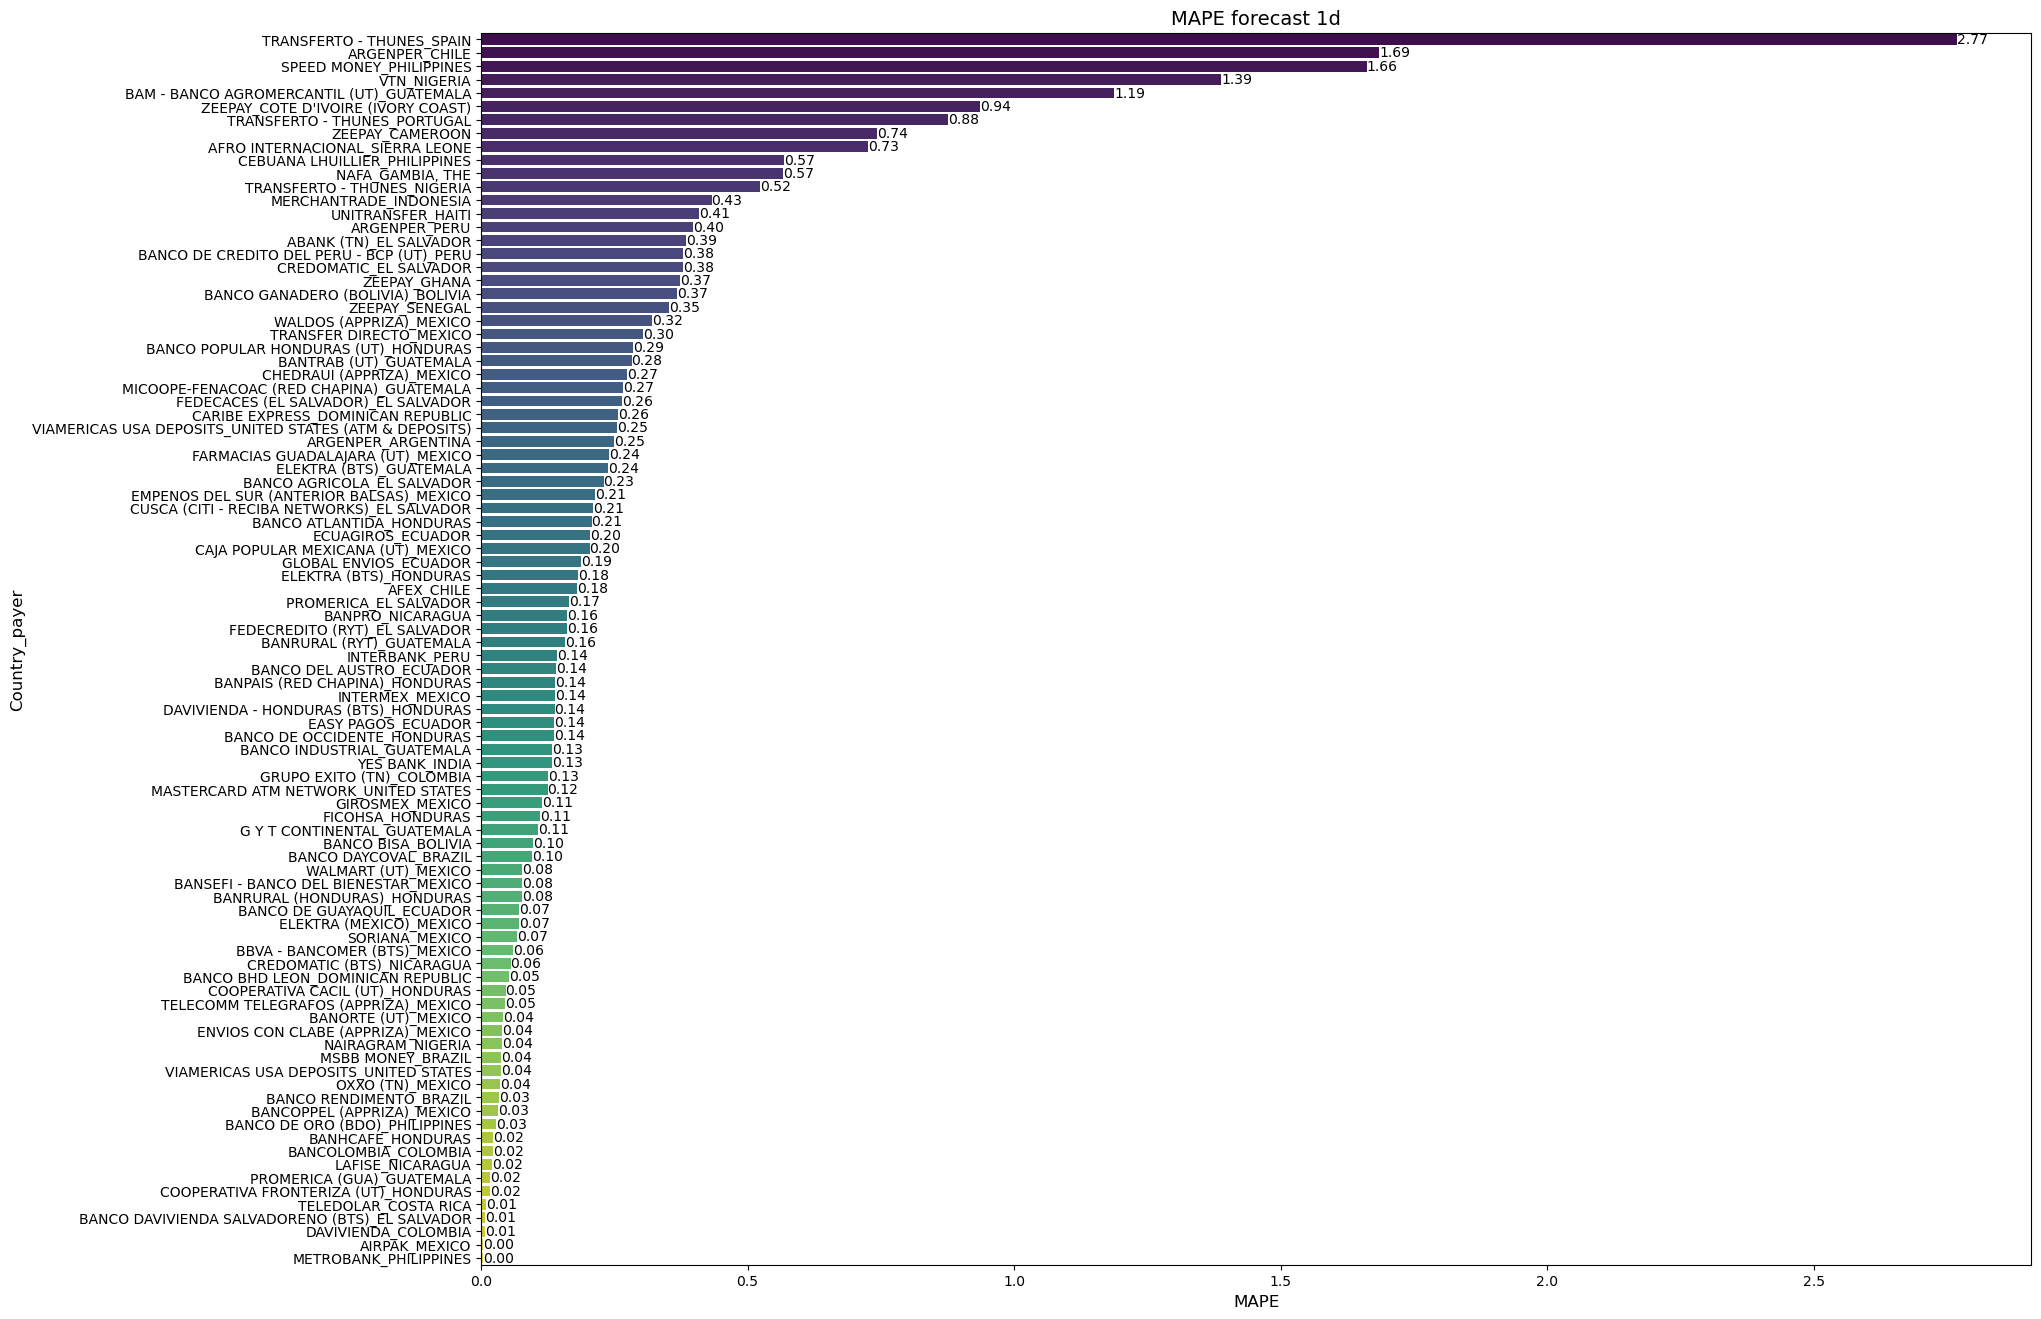

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

forecast_1d = forecast_1d.sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [126]:
##FORECAST 1D MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_1d_country = forecast_1d.groupby('country')['pe'].mean().reset_index()
forecast_1d_country.sort_values('pe')

,country,pe
6,COSTA RICA,0.009600
5,COLOMBIA,0.052234
2,BRAZIL,0.055677
19,NICARAGUA,0.079147
27,UNITED STATES,0.080736
15,HONDURAS,0.123700
18,MEXICO,0.123988
16,INDIA,0.132839
9,ECUADOR,0.148491
8,DOMINICAN REPUBLIC,0.154428


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


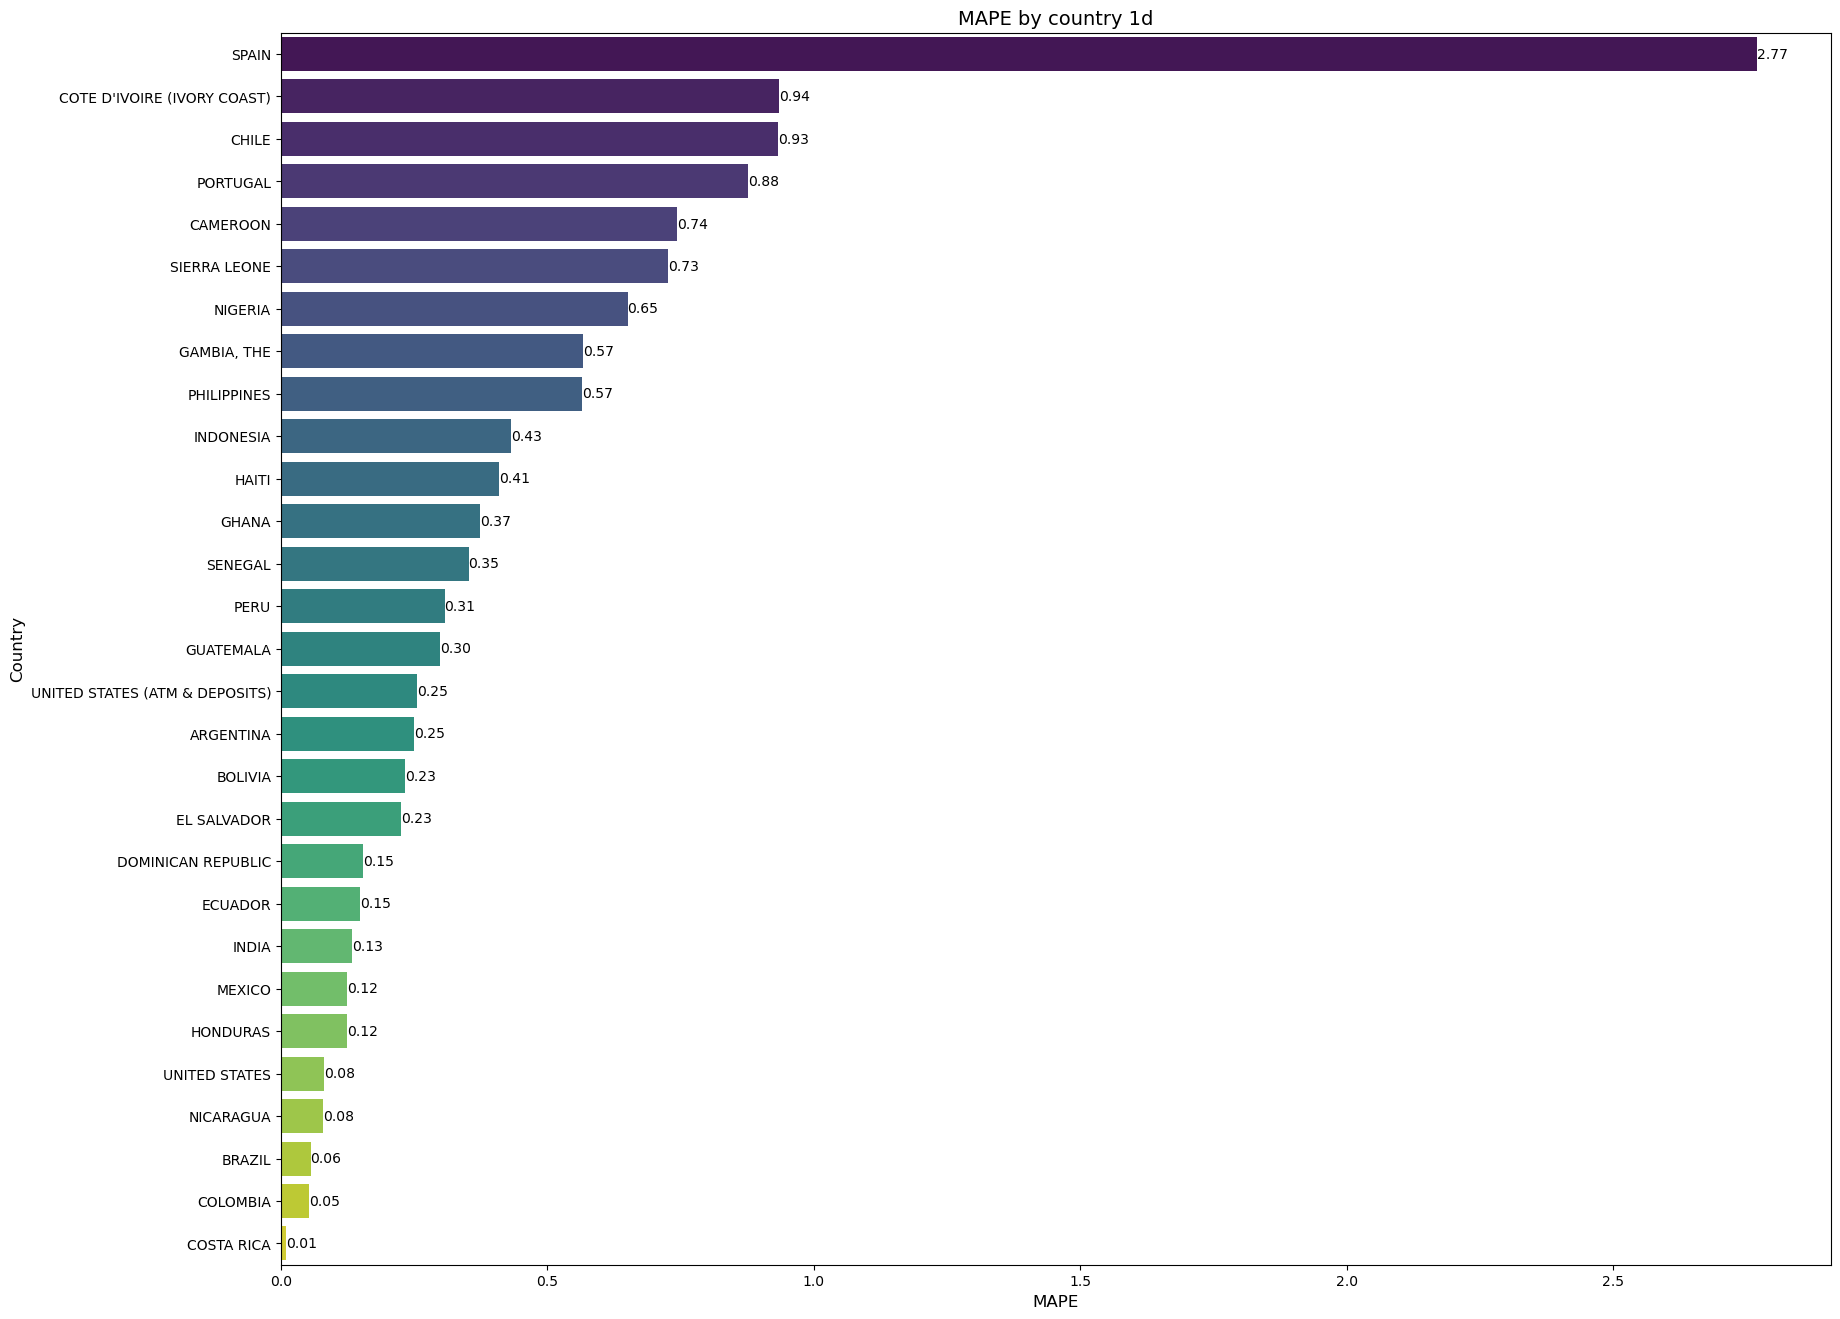

In [127]:
forecast_1d_country=forecast_1d_country.sort_values('pe', ascending=False)
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_1d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [128]:
##WAPE A 1 DÍA GENERAL##
forecast_1d["ae"] = abs((forecast_1d.amount - forecast_1d['mean']))
print(forecast_1d.ae.sum() / forecast_1d.amount.sum())

0.10348806939188057


In [295]:
##WAPE POR PAÍSES##

In [129]:
wape_country_f1d = forecast_1d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


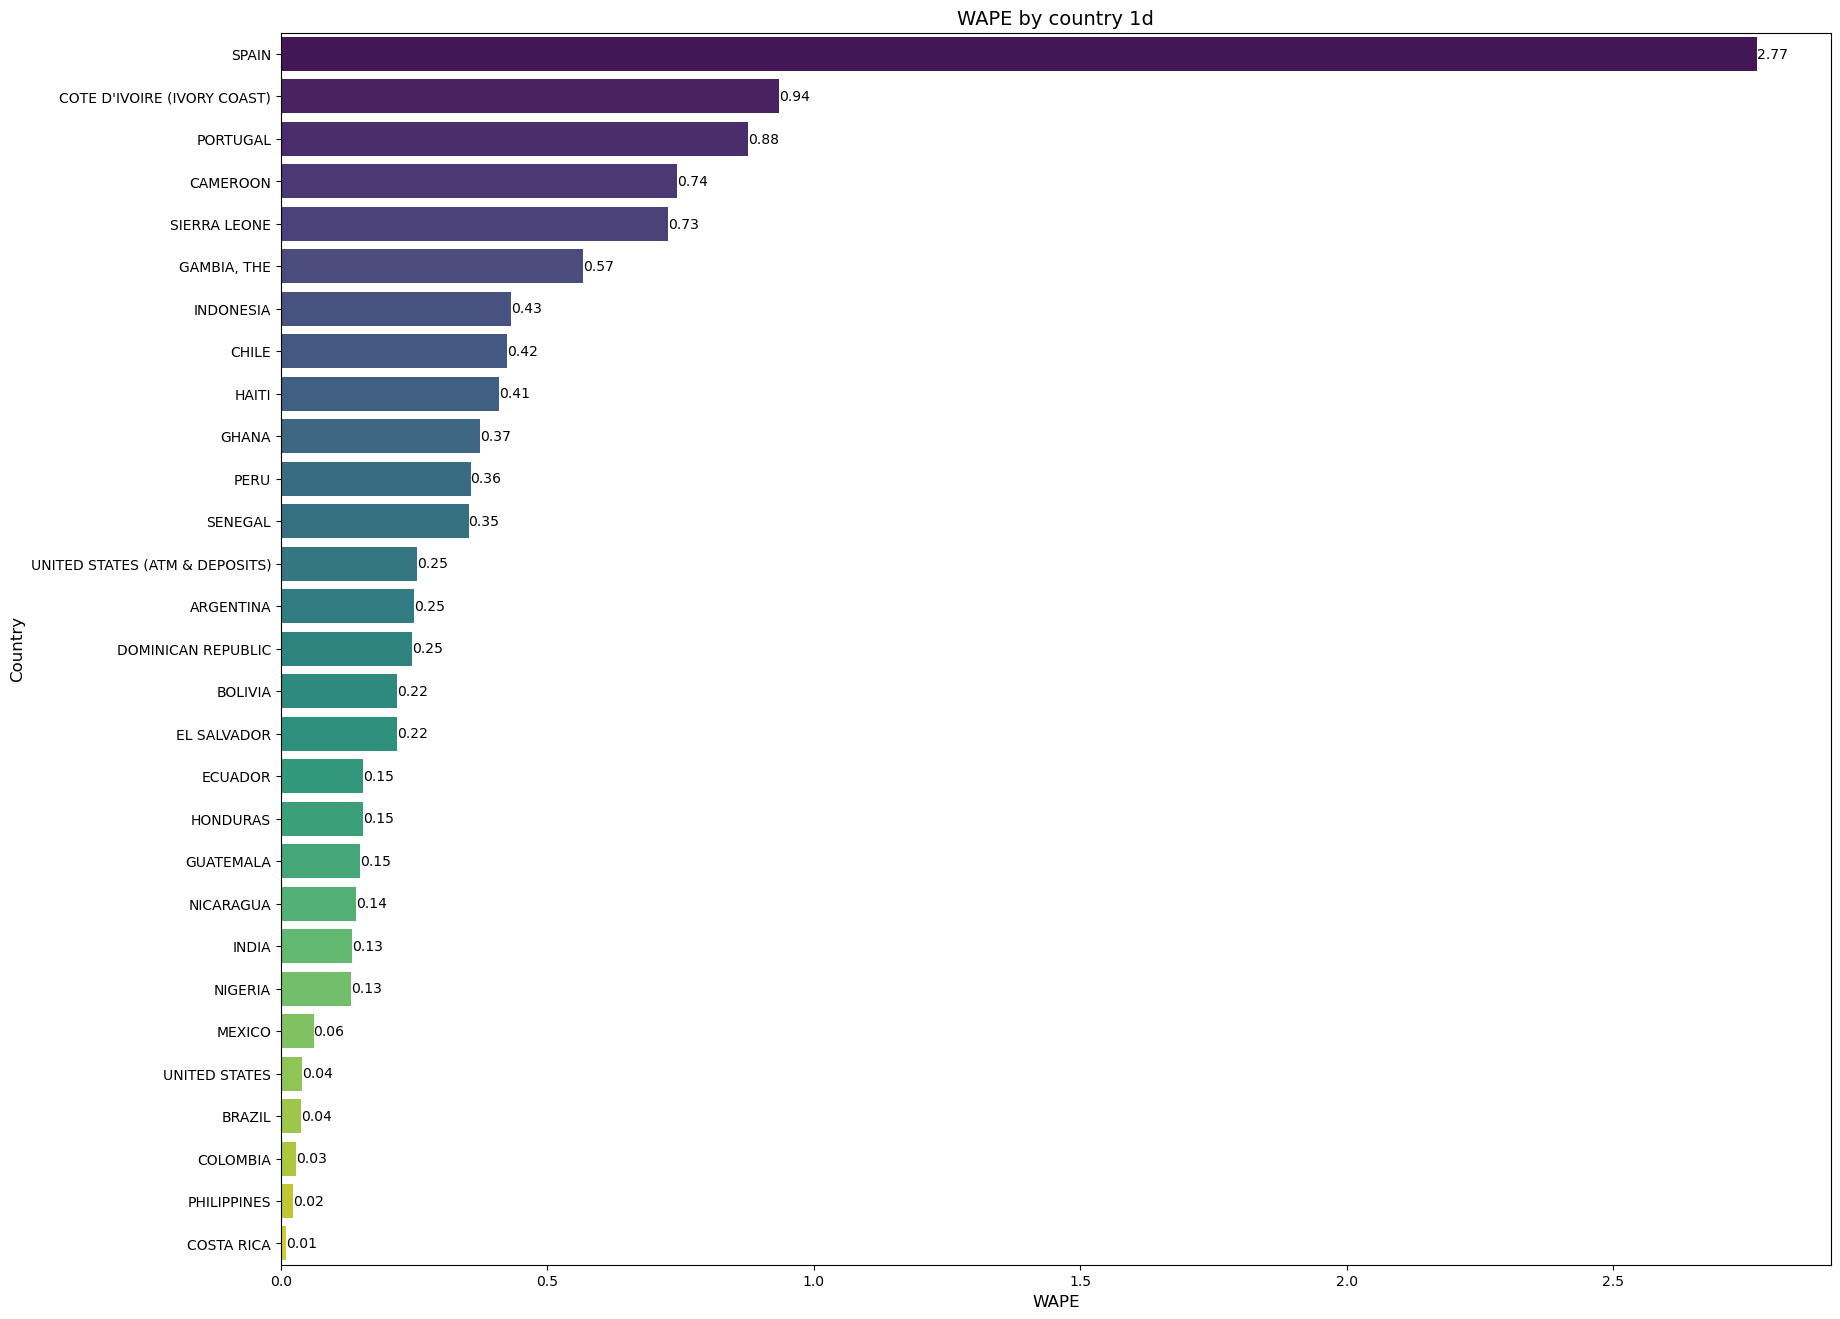

In [130]:
wape_country_f1d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f1d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()


In [166]:
##MAPE A 3 DIAS##
###MAPE FORECAST A 3 DÍAS##
forecast_3d=df_forecast_final.loc[df_forecast_final.date<='2022-11-28']

In [167]:
forecast_3d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country
582,ELEKTRA (MEXICO),MEXICO,2022-11-26,8178210.95,8.250253e+06,9.420317e+06,1.037329e+07,9.401130e+06,ELEKTRA (MEXICO)_MEXICO
89,ELEKTRA (MEXICO),MEXICO,2022-11-27,7433363.12,7.672080e+06,8.718699e+06,9.710198e+06,8.717377e+06,ELEKTRA (MEXICO)_MEXICO
714,ELEKTRA (MEXICO),MEXICO,2022-11-28,6803437.27,6.282353e+06,7.146394e+06,8.048824e+06,7.155116e+06,ELEKTRA (MEXICO)_MEXICO
101,BANCOPPEL (APPRIZA),MEXICO,2022-11-26,4701768.00,4.946270e+06,5.592504e+06,6.119088e+06,5.589479e+06,BANCOPPEL (APPRIZA)_MEXICO
238,BANCOPPEL (APPRIZA),MEXICO,2022-11-27,4252048.02,4.557570e+06,5.171891e+06,5.807206e+06,5.176740e+06,BANCOPPEL (APPRIZA)_MEXICO
82,BANRURAL (RYT),GUATEMALA,2022-11-27,4022342.64,4.257456e+06,5.023209e+06,5.609409e+06,5.023209e+06,BANRURAL (RYT)_GUATEMALA
733,BANCOPPEL (APPRIZA),MEXICO,2022-11-28,3768704.82,3.488758e+06,4.062770e+06,4.661427e+06,4.064734e+06,BANCOPPEL (APPRIZA)_MEXICO
687,BANRURAL (RYT),GUATEMALA,2022-11-26,3390630.21,3.624764e+06,4.135429e+06,4.593710e+06,4.135429e+06,BANRURAL (RYT)_GUATEMALA
162,BANCO INDUSTRIAL,GUATEMALA,2022-11-27,3254725.63,3.315295e+06,3.820230e+06,4.229897e+06,3.815602e+06,BANCO INDUSTRIAL_GUATEMALA
197,BANCO INDUSTRIAL,GUATEMALA,2022-11-26,2954785.67,2.730129e+06,3.110228e+06,3.435294e+06,3.101904e+06,BANCO INDUSTRIAL_GUATEMALA


In [168]:
forecast_3d.date.min(),forecast_3d.date.max()

(Timestamp('2022-11-26 00:00:00'), Timestamp('2022-11-28 00:00:00'))

In [169]:
##MAPE PROMEDIO A 3 D (para los que tienen MAPE definido)
forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)
forecast_3d.pe.mean()

/tmp/ipykernel_899/383919511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)


0.47366357405975706

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


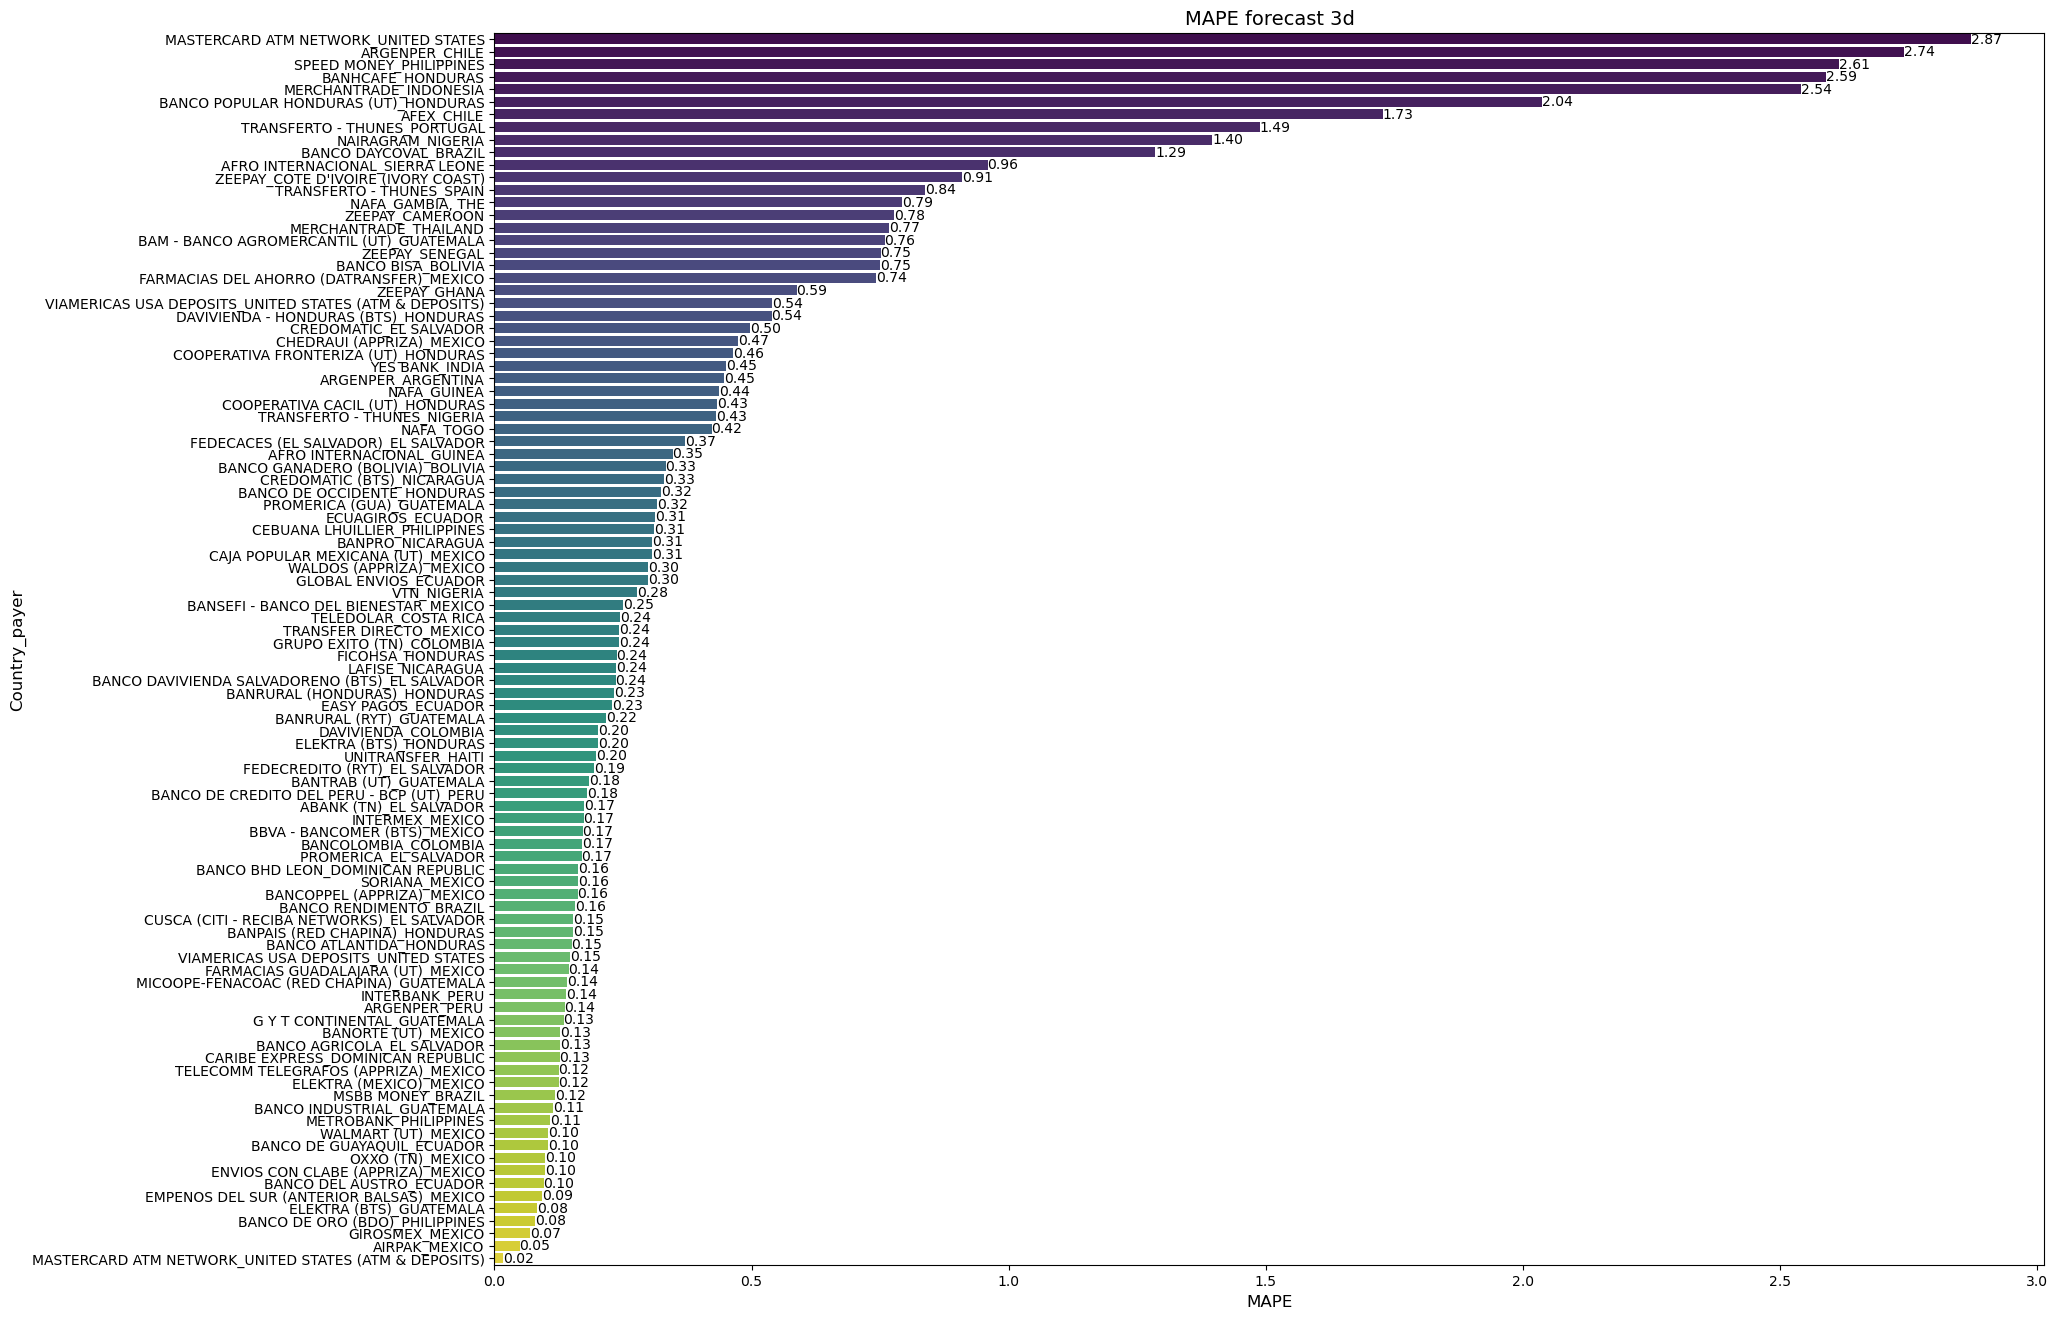

In [170]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_3d_payer_country = forecast_3d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_3d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [171]:
##FORECAST 3DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_3d_country = forecast_3d.groupby('country')['pe'].mean().reset_index()
forecast_3d_country=forecast_3d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


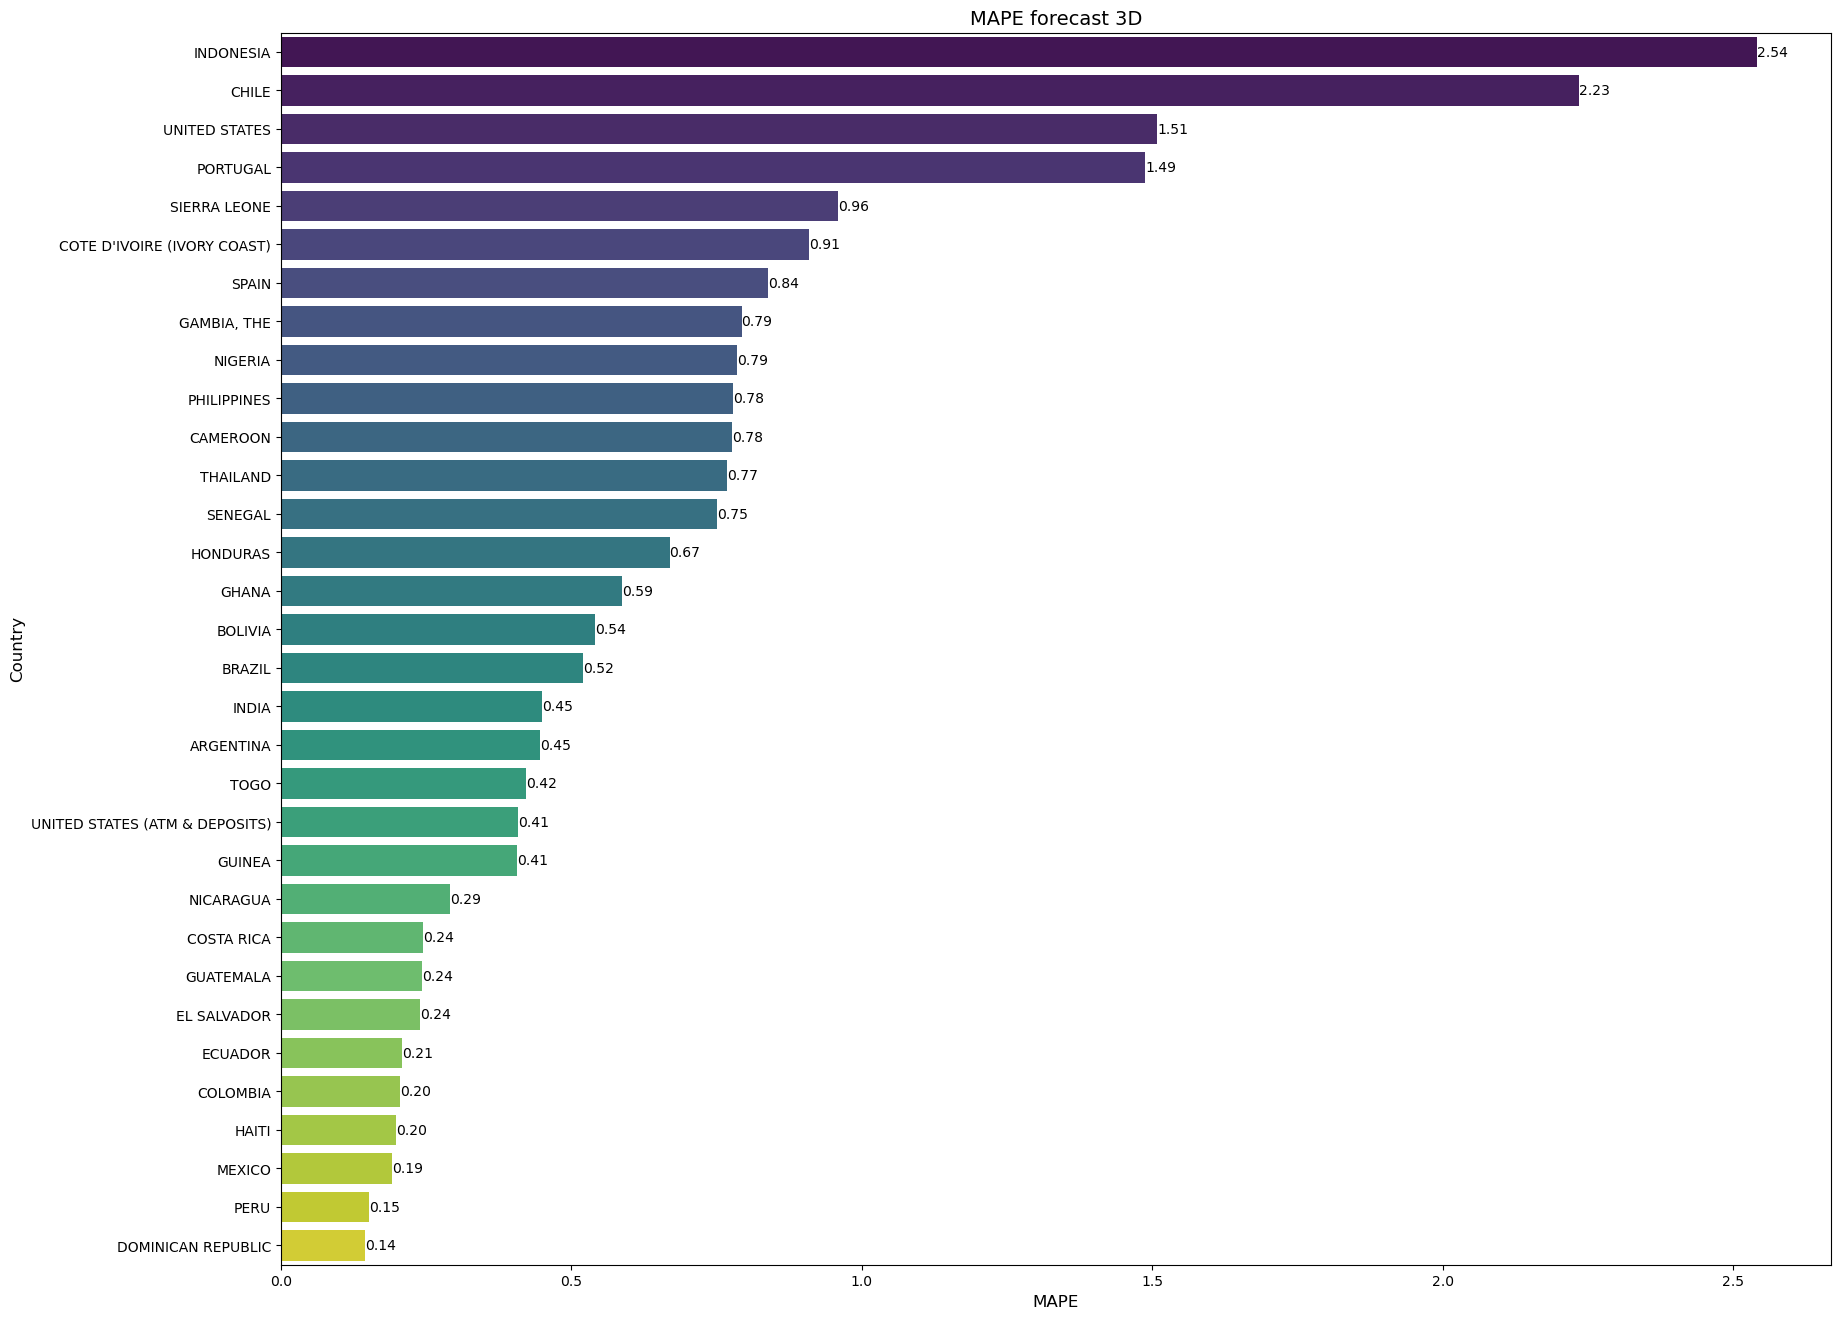

In [172]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_3d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE forecast 3D', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [173]:
##WAPE A 3 DÍAS GENERAL##
forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))
print(forecast_3d.ae.sum() / forecast_3d.amount.sum())

0.15925860725989963


/tmp/ipykernel_899/4007322800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))


In [174]:
##WAPE POR PAÍSES 3d##

In [175]:
wape_country_f3d = forecast_3d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


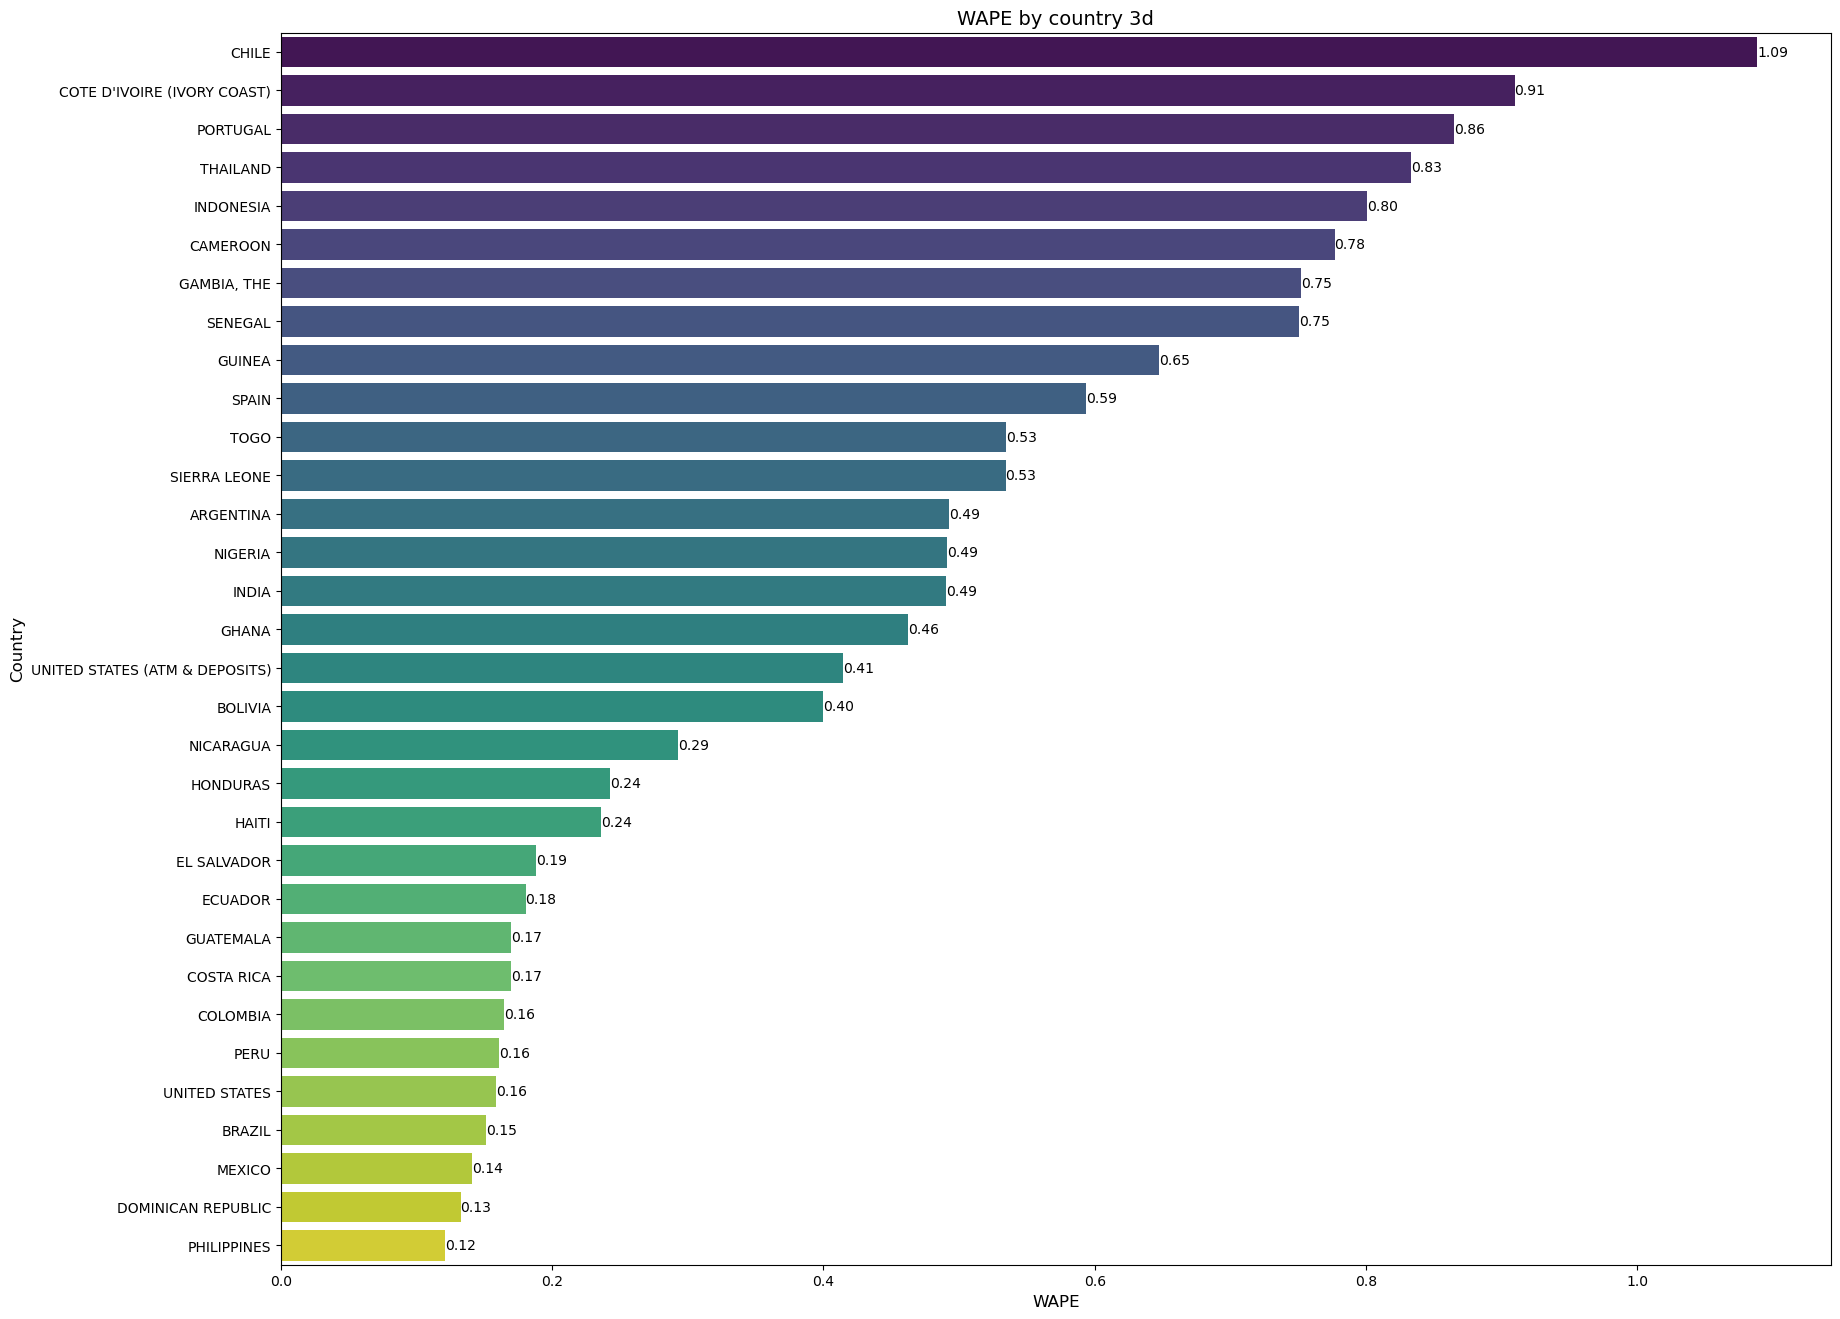

In [176]:
wape_country_f3d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f3d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f3d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [177]:
##MAPE A 7 DIAS##
###MAPE FORECAST 7 DÍAS##
forecast_7d=df_forecast_final

In [178]:
forecast_7d.shape

(653, 9)

In [179]:
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)

In [180]:
forecast_7d.date.min(),forecast_7d.date.max()

(Timestamp('2022-11-26 00:00:00'), Timestamp('2022-12-02 00:00:00'))

In [181]:
##MAPE PROMEDIO A 7 D (para los que tienen MAPE definido)
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)
forecast_7d.pe.mean()

0.461609175799776

In [314]:
##MAPE PROMEDIO A 7 DIAS POR PAYER

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


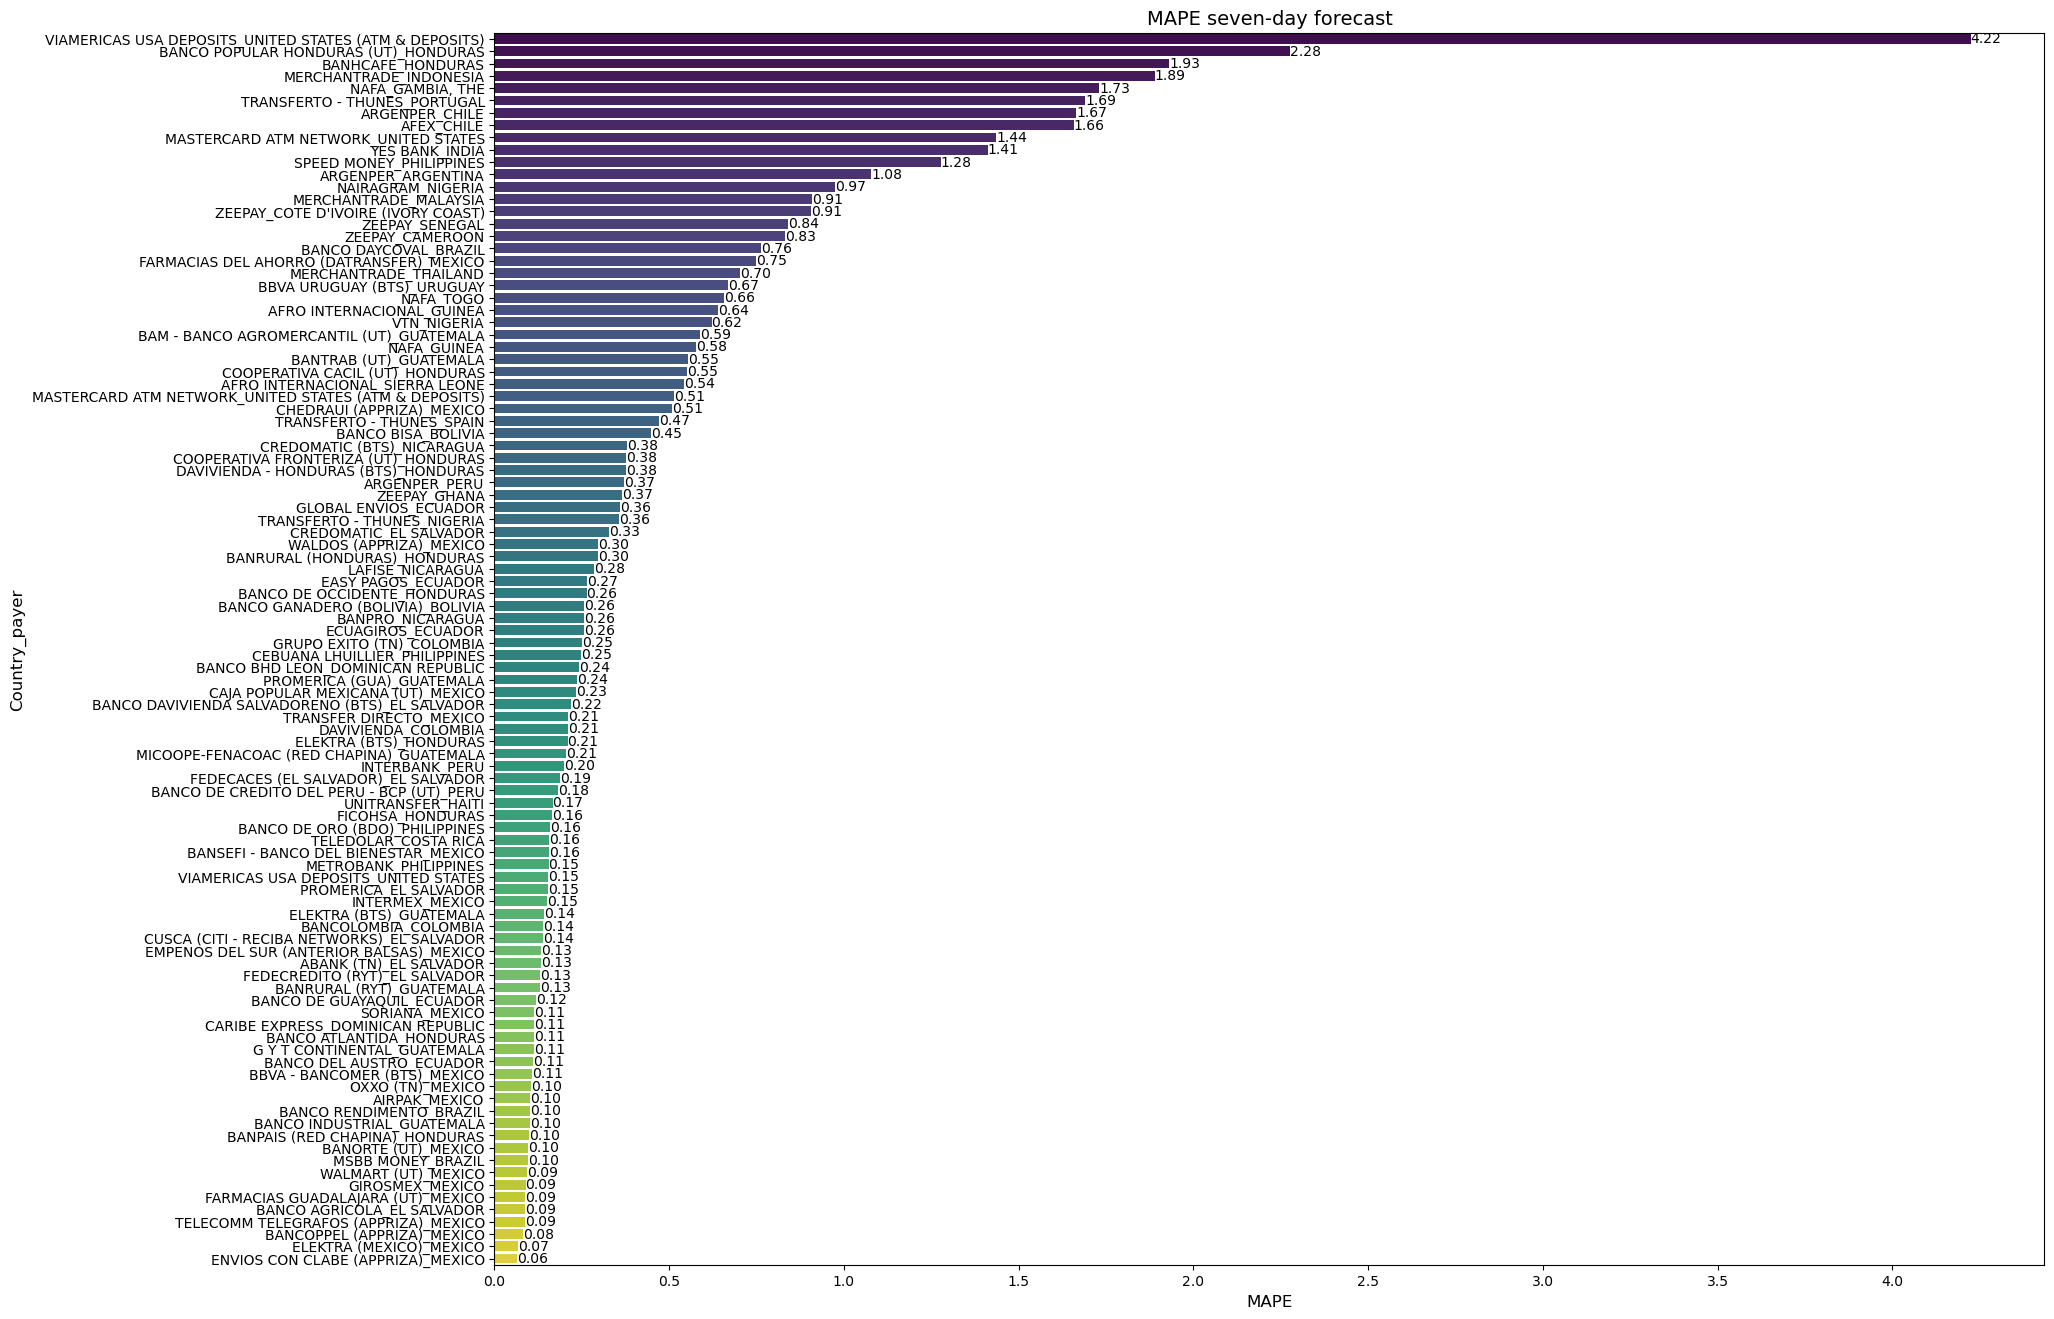

In [182]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_7d_payer_country = forecast_7d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_7d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE seven-day forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [183]:
##FORECAST 7DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_7d_country = forecast_7d.groupby('country')['pe'].mean().reset_index()
forecast_7d_country=forecast_7d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


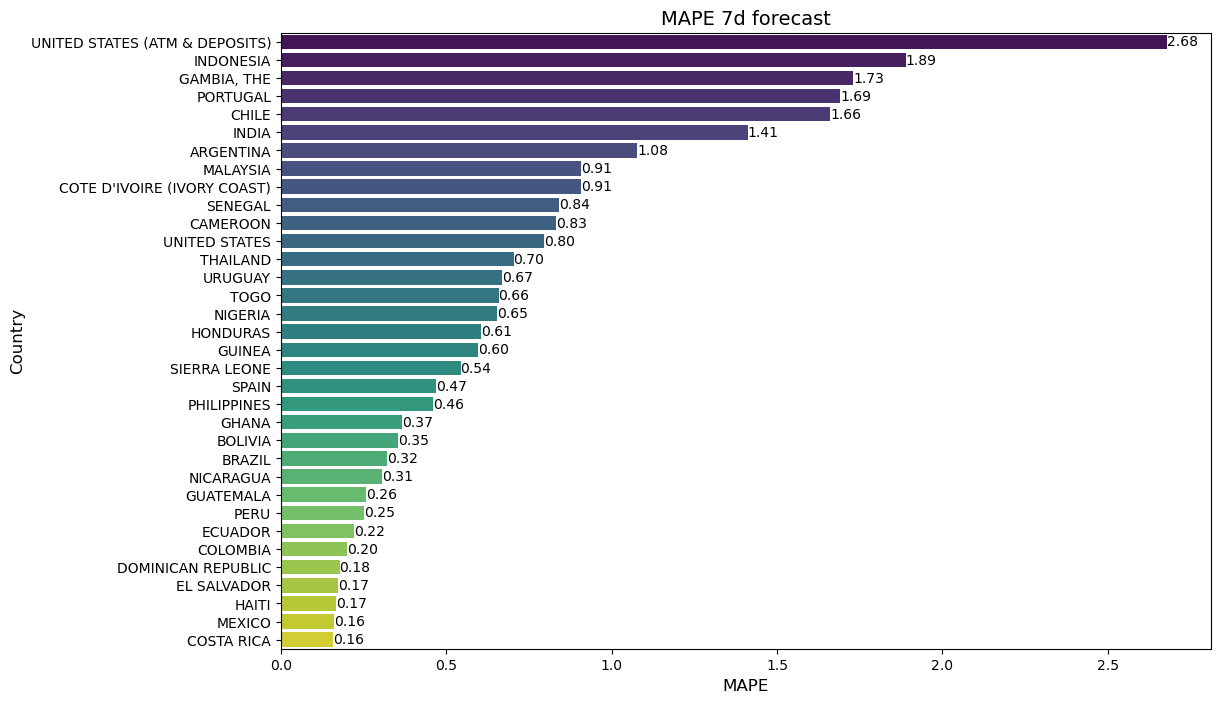

In [184]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_7d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE 7d forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [185]:
##WAPE A 7 DIAS GENERAL##
forecast_7d=df_forecast_final
forecast_7d["ae"] = abs((forecast_7d.amount - forecast_7d['mean']))
print(forecast_7d.ae.sum() / forecast_7d.amount.sum())

0.11345721605378337


In [ ]:
#WAPE POR PAISES A 7 DIAS

In [187]:
wape_country_f7d = forecast_7d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


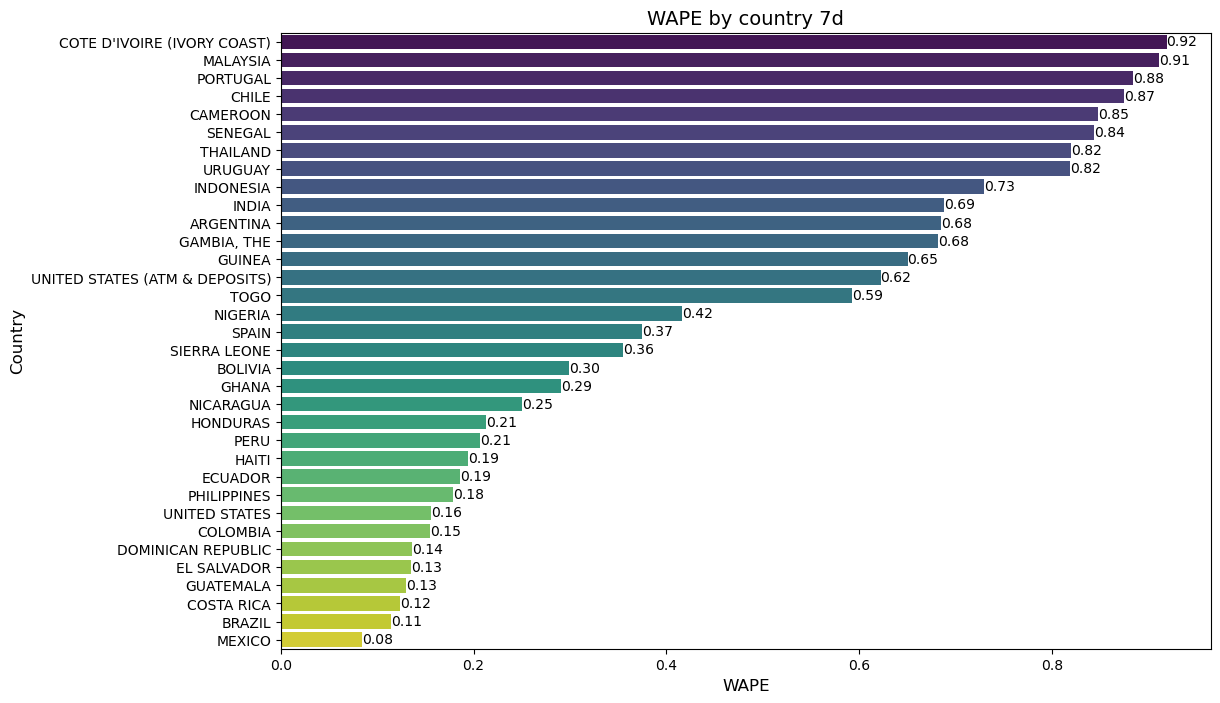

In [188]:
wape_country_f7d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f7d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 7d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f7d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()
